In [20]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os
from pathlib import Path
import PIL

In [121]:
mask_path = "../datas/raw_datas/masks/0002_B_V_60_G_mask.png"
img_path = "../datas/raw_datas/images/0002_B_V_60_G.jpg"

In [122]:
mask = Image.open(mask_path)
mask = np.asarray(mask)/255

In [123]:
img = Image.open(img_path)
img = np.asarray(img)/255

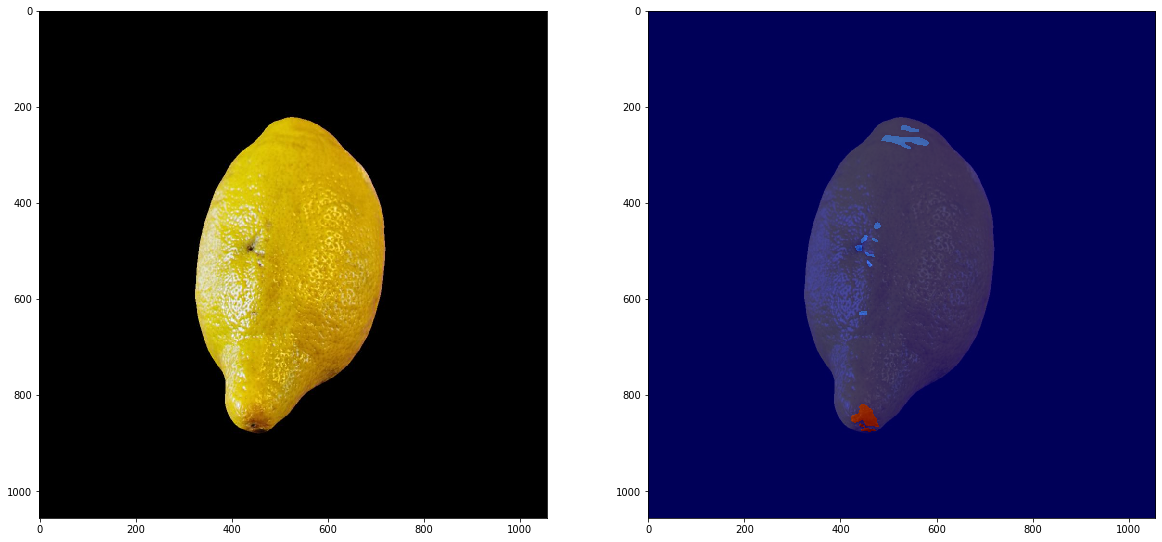

In [124]:
plt.figure(figsize=(20,20))
plt.subplot(1,2,1)
plt.imshow(img, interpolation='none')
plt.subplot(1,2,2)
plt.imshow(img, interpolation='none')
plt.imshow(mask, 'jet', interpolation='none', alpha=0.7)
plt.show()

In [5]:

# Access all PNG files in directory
allfiles=os.listdir("../datas/raw_datas/images/")
imlist=[filename for filename in allfiles if  filename[-4:] in ".jpg"]




In [6]:
imlist[:5]

['0001_G_H_30_A.jpg',
 '0011_G_I_75_F.jpg',
 '0002_G_H_60_A.jpg',
 '0003_B_I_0_H.jpg',
 '0006_A_V_0_C.jpg']

In [8]:
# Assuming all images are the same size, get dimensions of first image
w,h=Image.open(f"../datas/raw_datas/images/{imlist[0]}").size
N=len(imlist)


/tmp/ipykernel_282418/3159366563.py:6: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  imarr=np.array(Image.open(f"../datas/raw_datas/images/{im}"),dtype=np.float)


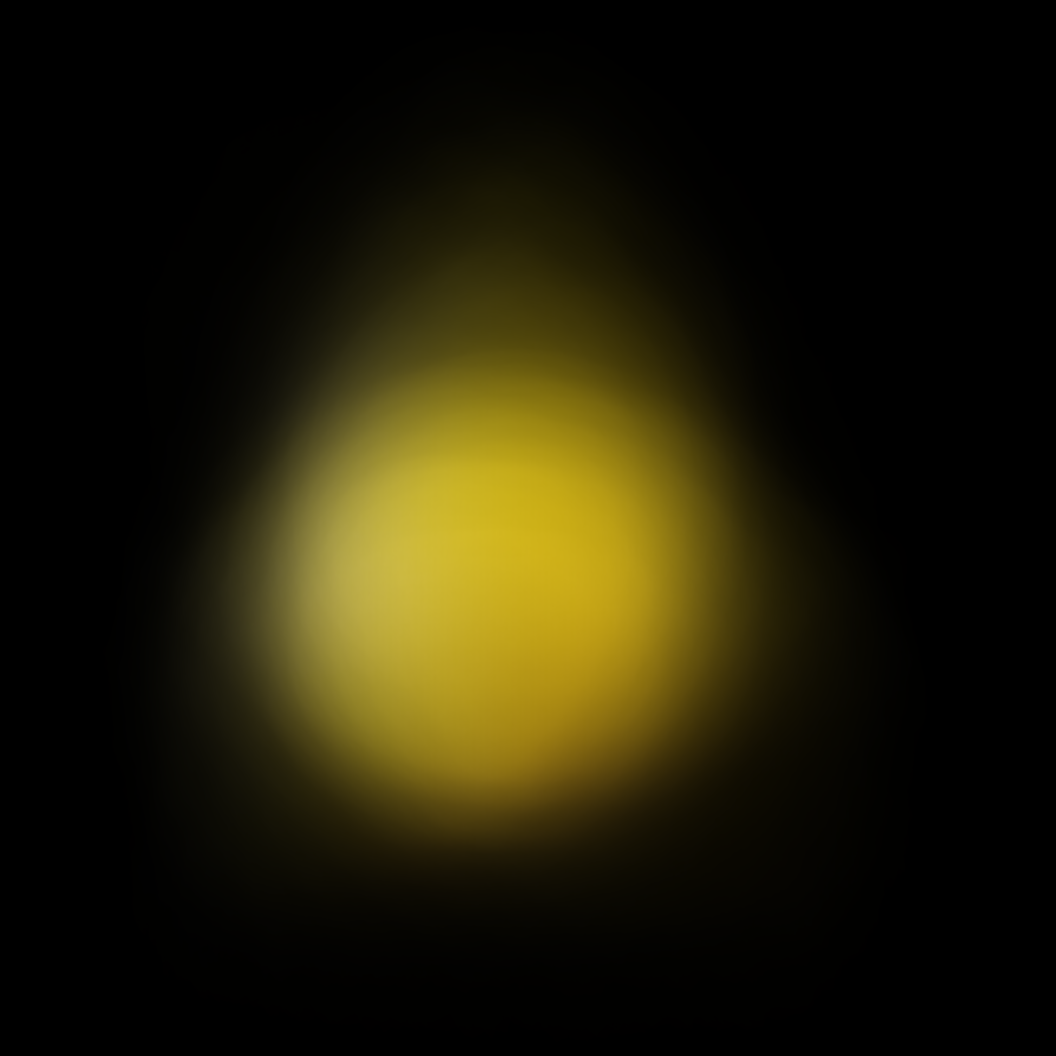

In [11]:
# Create a numpy array of floats to store the average (assume RGB images)
arr=np.zeros((h,w,3),float)

# Build up average pixel intensities, casting each image as an array of floats
for im in imlist:
    imarr=np.array(Image.open(f"../datas/raw_datas/images/{im}"),dtype=float)
    arr=arr+imarr/N

# Round values in array and cast as 8-bit integer
arr=np.array(np.round(arr),dtype=np.uint8)

# Generate, save and preview final image
out=Image.fromarray(arr,mode="RGB")
out.save("Average.png")
out.show()


In [23]:
type(out)

PIL.Image.Image

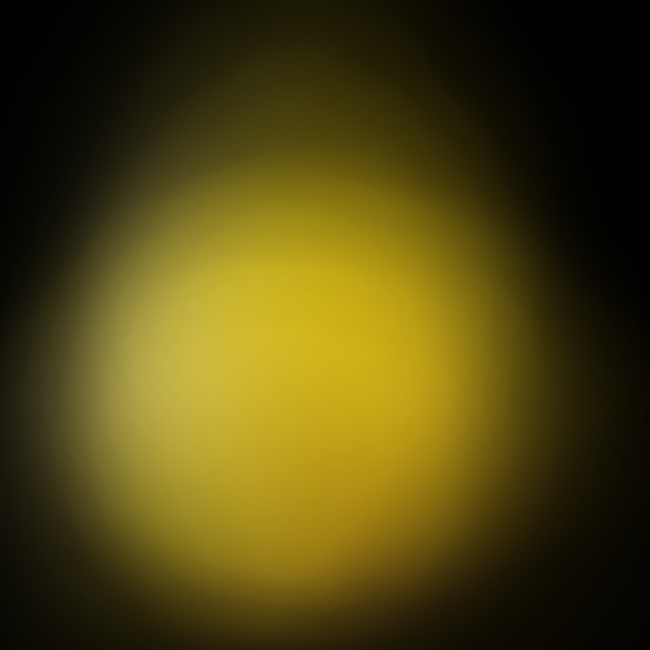

In [15]:
# Setting the points for cropped image
left = 200
top = 200
right = 850
bottom = 850
 
# Cropped image of above dimension
# (It will not change original image)
out_crop = out.crop((left, top, right, bottom))
 
# Shows the image in image viewer
out_crop.show()

In [16]:
from src.utils.utils import get_items_list

In [27]:
images_paths = get_items_list(
    directory="../datas/raw_datas/images",
    extension=".jpg",
)
masks_paths = get_items_list(
    directory="../datas/raw_datas/masks",
    extension=".png",
)

In [43]:
len(images_paths), len(masks_paths)

(2690, 2690)

In [44]:
# Setting the points for cropped image
left = 200
top = 200
right = 840
bottom = 840
 

for image_path in images_paths:
    image = Image.open(image_path)
    
    image_name = Path(image_path).stem
    image_crop_path = Path(image_path).parent
    image_crop_name = f"{image_name}_{'crop'}{'.jpg'}"
    
    # Cropped image of above dimension
    # (It will not change original image)
    img_crop = image.crop((left, top, right, bottom))
    img_crop.save(f"{Path('./image_crop')}/{Path(image_crop_name)}")
 

In [45]:
# Setting the points for cropped image
left = 200
top = 200
right = 840
bottom = 840
 

for image_path in masks_paths:
    image = Image.open(image_path)
    
    image_name = Path(image_path).stem
    image_crop_path = Path(image_path).parent
    image_crop_name = f"{image_name}_{'crop'}{'.png'}"
    
    # Cropped image of above dimension
    # (It will not change original image)
    img_crop = image.crop((left, top, right, bottom))
    img_crop.save(f"{Path('./mask_crop')}/{Path(image_crop_name)}")
 